5 Data Pertama:
    CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


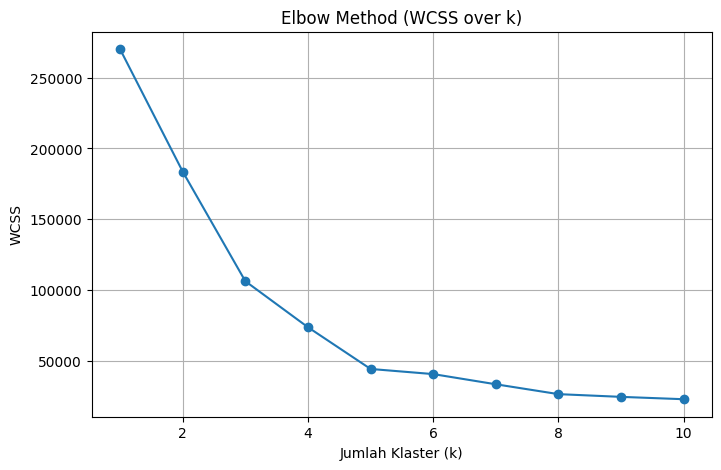

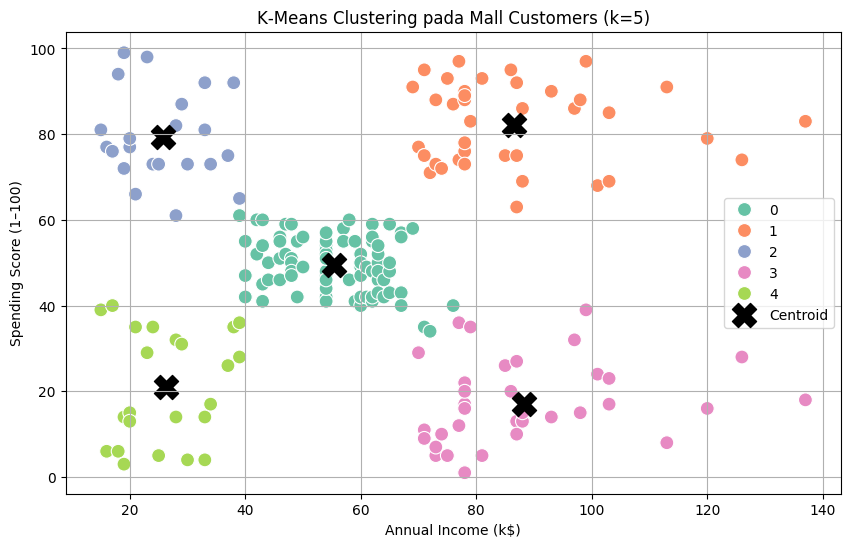


Rata-rata Fitur per Klaster:
         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 55.296296               49.518519
1                 86.538462               82.128205
2                 25.727273               79.363636
3                 88.200000               17.114286
4                 26.304348               20.913043


In [ ]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Load Dataset
url = 'https://raw.githubusercontent.com/tanishq21/Mall-Customers/main/Mall_Customers.csv'
df = pd.read_csv(url)
print("5 Data Pertama:\n", df.head())

# Pilih Fitur untuk Clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Tentukan Jumlah Klaster dengan Elbow Method
wcss = []
for k in range(1, 11):
    kmeans_temp = KMeans(n_clusters=k, random_state=42)
    kmeans_temp.fit(X)
    wcss.append(kmeans_temp.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method (WCSS over k)')
plt.xlabel('Jumlah Klaster (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

# Terapkan K-Means dengan k = 5
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Visualisasi Klaster dan Centroid
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    data=df,
    palette='Set2',
    s=100
)

centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    s=300,
    c='black',
    marker='X',
    label='Centroid'
)

plt.title('K‑Means Clustering pada Mall Customers (k=5)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1–100)')
plt.legend()
plt.grid(True)
plt.show()

# Analisis Statistik Tiap Klaster
print("\nRata-rata Fitur per Klaster:")
print(df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean())
